In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#  For the linear regression part, I don't use the time series. But I have a single part for time series analysis.

In [44]:
data_2018 = pd.read_csv('df_2018_total.csv')
data_2019 = pd.read_csv('df_2019_total.csv')
data_2020 = pd.read_csv('df_2020_total.csv')

/Users/yanghang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 2018

In [5]:
data_2018['Month_day'] = data_2018['Month']*100+data_2018['Day']
data_2018.groupby('Month_day').count()['Day']
data_2018['Month_day']
data_num_day = pd.DataFrame(data_2018.groupby('Month_day').count()['Day']).reset_index()
data_num_day.rename(columns={'Month_day':'Date','Day':'Number of violations'},inplace=True)

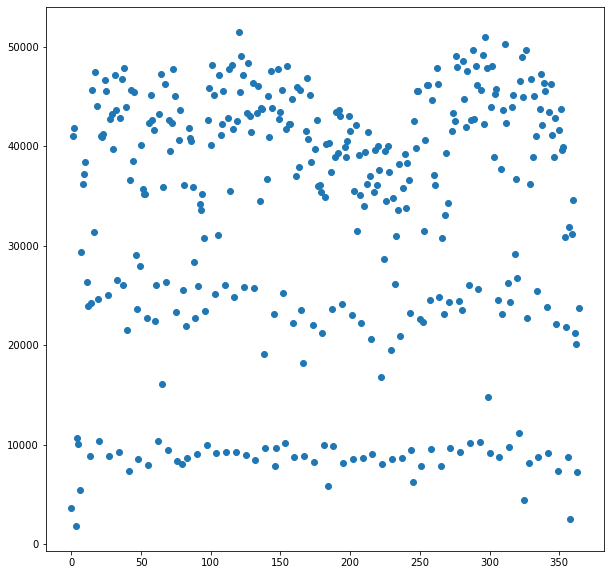

In [11]:
fig=plt.figure(figsize=(10,10))
plt.scatter(np.arange(len(data_num_day)),data_num_day['Number of violations'])

The slope is 5.40709531482753 and the intercept is 31277.55386574922.


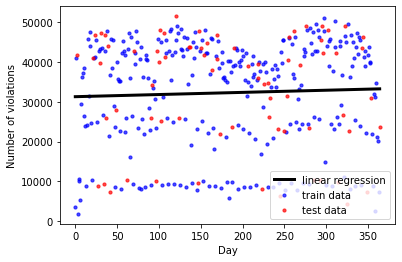

In [12]:
x = np.arange(len(data_num_day))
y = data_num_day.iloc[:,1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
reg = linear_model.LinearRegression()
reg.fit(x_train.reshape(-1,1),y_train)
y_predict = reg.predict(x.reshape(-1,1))

plt.xlabel('Day',fontsize=10)
plt.ylabel('Number of violations',fontsize=10)
plt.scatter(x_train,y_train,color='b',s=10,alpha=0.7,label='train data')
plt.scatter(x_test,y_test,color='r',s=10,alpha=0.7,label='test data')
plt.plot(x,y_predict,color='black',label='linear regression',linewidth=3)
print('The slope is {} and the intercept is {}.'.format(float(reg.coef_),reg.intercept_))
plt.legend()

The slope is [ 0.00000000e+00  3.30587044e+02 -3.22837391e+00  1.23351943e-02
 -1.60811398e-05] and the intercept is 22370.59608714549.


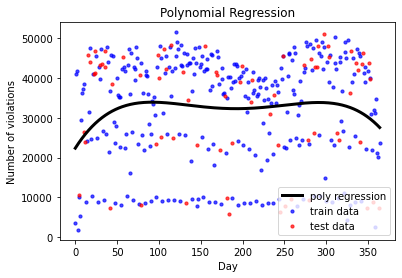

In [13]:
x = np.arange(len(data_num_day))
y = data_num_day.iloc[:,1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(x_train.reshape(-1,1)) 

poly.fit(X_poly, y_train) 
reg2 = linear_model.LinearRegression() 
reg2.fit(X_poly, y_train) 

plt.scatter(x_train,y_train,color='b',s=10,alpha=0.7,label='train data')
plt.scatter(x_test,y_test,color='r',s=10,alpha=0.7,label='test data') 
plt.plot(x, reg2.predict(poly.fit_transform(x.reshape(-1,1))), color = 'black',linewidth=3,label='poly regression') 
plt.title('Polynomial Regression') 
plt.xlabel('Day',fontsize=10)
plt.ylabel('Number of violations',fontsize=10)
plt.legend()
print('The slope is {} and the intercept is {}.'.format(reg2.coef_,reg2.intercept_))

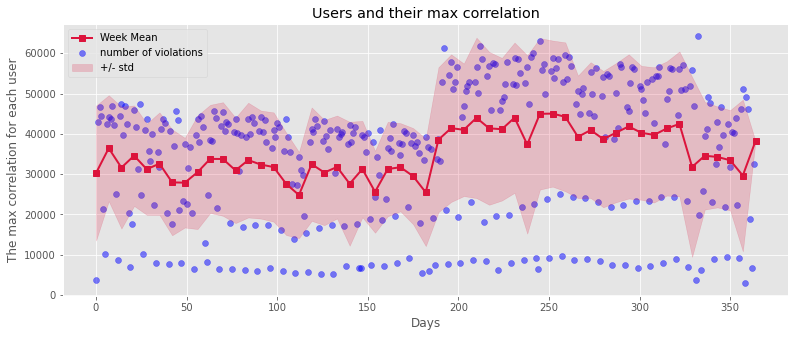

In [149]:
width = 7
grid = list(np.arange(0,len(data_num_day),width))
cond_mean = np.zeros(len(grid))
cond_std = np.zeros(len(grid))
count = 0
lst = []

for i,ii in enumerate(grid):
    for j in range(len(data_num_day)):
        if j >= ii and j < ii + width:
            count += 1
            cond_mean[i] += data_num_day['Number of violations'][j]
    cond_mean[i] = cond_mean[i]*(1/count)
    count = 0

for i,ii in enumerate(grid):
    for j in range(len(data_num_day)):
        if j >= ii and j < ii + width:
            lst.append(data_num_day['Number of violations'][j])
    cond_std[i] = np.std(lst)
    lst = []


plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(data_num_day)),data_num_day['Number of violations'], alpha = 0.5,color='blue',label='number of violations')
plt.plot(grid[:],cond_mean[:],'-s',lw=2,color='crimson', label="Week Mean ")
plt.fill_between(grid[:], cond_mean[:]-cond_std[:], 
                cond_mean[:]+cond_std[:], color='crimson', alpha=0.2, label="+/- std")
plt.xlabel('Days')
plt.ylabel('The max correlation for each user')
plt.title('Users and their max correlation')
plt.legend()

# 2019

In [144]:
data_2019['Month_day'] = data_2019['Month']*100+data_2019['Day']
data_2019.groupby('Month_day').count()['Day']
data_2019['Month_day']
data_num_day = pd.DataFrame(data_2019.groupby('Month_day').count()['Day']).reset_index()
data_num_day.rename(columns={'Month_day':'Date','Day':'Number of violations'},inplace=True)

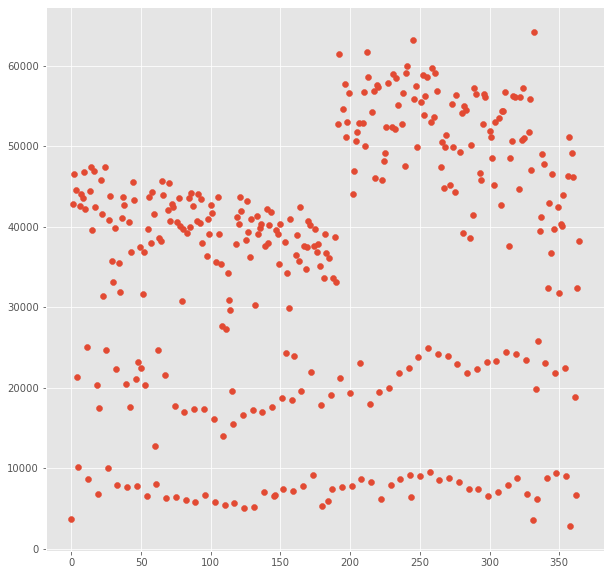

In [145]:
fig=plt.figure(figsize=(10,10))
plt.scatter(np.arange(len(data_num_day)),data_num_day['Number of violations'])

The slope is 28.321459159967556 and the intercept is 29729.757859391968.


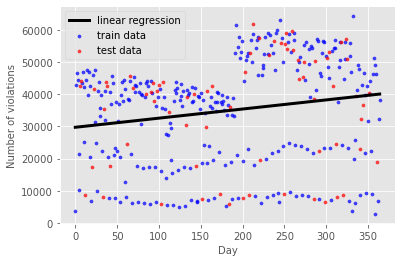

In [146]:
x = np.arange(len(data_num_day))
y = data_num_day.iloc[:,1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
reg = linear_model.LinearRegression()
reg.fit(x_train.reshape(-1,1),y_train)
y_predict = reg.predict(x.reshape(-1,1))

plt.xlabel('Day',fontsize=10)
plt.ylabel('Number of violations',fontsize=10)
plt.scatter(x_train,y_train,color='b',s=10,alpha=0.7,label='train data')
plt.scatter(x_test,y_test,color='r',s=10,alpha=0.7,label='test data')
plt.plot(x,y_predict,color='black',label='linear regression',linewidth=3)
print('The slope is {} and the intercept is {}.'.format(float(reg.coef_),reg.intercept_))
plt.legend()

The slope is [ 0.00000000e+00 -1.65822362e+02  9.59979740e-01  1.05734160e-03
 -7.20699060e-06] and the intercept is 35015.997016892725.


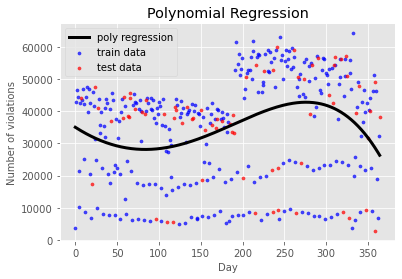

In [147]:
x = np.arange(len(data_num_day))
y = data_num_day.iloc[:,1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(x_train.reshape(-1,1)) 

poly.fit(X_poly, y_train) 
reg2 = linear_model.LinearRegression() 
reg2.fit(X_poly, y_train) 

plt.scatter(x_train,y_train,color='b',s=10,alpha=0.7,label='train data')
plt.scatter(x_test,y_test,color='r',s=10,alpha=0.7,label='test data') 
plt.plot(x, reg2.predict(poly.fit_transform(x.reshape(-1,1))), color = 'black',linewidth=3,label='poly regression') 
plt.title('Polynomial Regression') 
plt.xlabel('Day',fontsize=10)
plt.ylabel('Number of violations',fontsize=10)
plt.legend()
print('The slope is {} and the intercept is {}.'.format(reg2.coef_,reg2.intercept_))

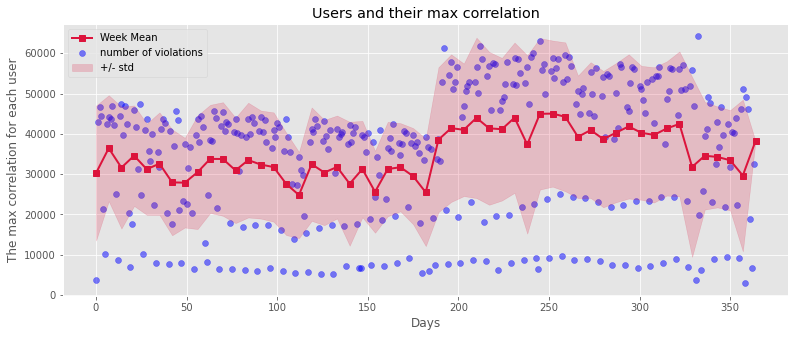

In [150]:
width = 7
grid = list(np.arange(0,len(data_num_day),width))
cond_mean = np.zeros(len(grid))
cond_std = np.zeros(len(grid))
count = 0
lst = []

for i,ii in enumerate(grid):
    for j in range(len(data_num_day)):
        if j >= ii and j < ii + width:
            count += 1
            cond_mean[i] += data_num_day['Number of violations'][j]
    cond_mean[i] = cond_mean[i]*(1/count)
    count = 0

for i,ii in enumerate(grid):
    for j in range(len(data_num_day)):
        if j >= ii and j < ii + width:
            lst.append(data_num_day['Number of violations'][j])
    cond_std[i] = np.std(lst)
    lst = []


plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(data_num_day)),data_num_day['Number of violations'], alpha = 0.5,color='blue',label='number of violations')
plt.plot(grid[:],cond_mean[:],'-s',lw=2,color='crimson', label="Week Mean ")
plt.fill_between(grid[:], cond_mean[:]-cond_std[:], 
                cond_mean[:]+cond_std[:], color='crimson', alpha=0.2, label="+/- std")
plt.xlabel('Days')
plt.ylabel('The max correlation for each user')
plt.title('Users and their max correlation')
plt.legend()

# 2020

In [151]:
data_2020['Month_day'] = data_2020['Month']*100+data_2020['Day']
data_2020.groupby('Month_day').count()['Day']
data_2020['Month_day']
data_num_day = pd.DataFrame(data_2020.groupby('Month_day').count()['Day']).reset_index()
data_num_day.rename(columns={'Month_day':'Date','Day':'Number of violations'},inplace=True)

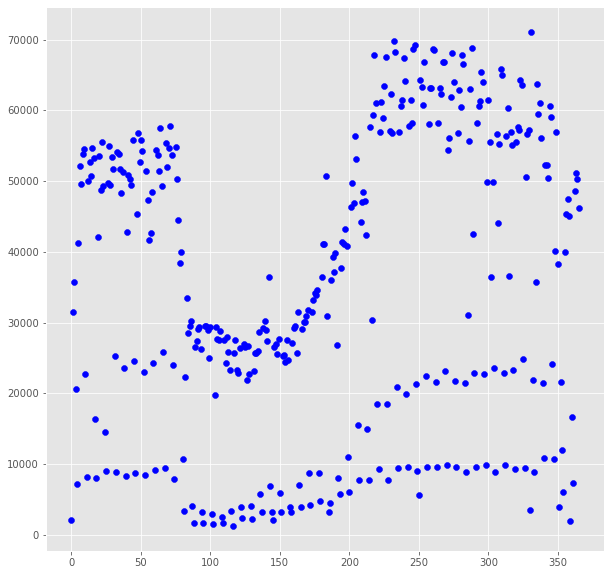

In [152]:
fig=plt.figure(figsize=(10,10))
plt.scatter(np.arange(len(data_num_day)),data_num_day['Number of violations'], color = 'b')

The slope is 29.976502153778526 and the intercept is 30274.311561571798.


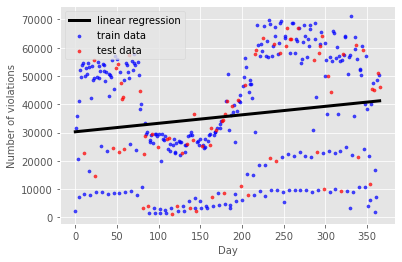

In [153]:
x = np.arange(len(data_num_day))
y = data_num_day.iloc[:,1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
reg = linear_model.LinearRegression()
reg.fit(x_train.reshape(-1,1),y_train)
y_predict = reg.predict(x.reshape(-1,1))

plt.xlabel('Day',fontsize=10)
plt.ylabel('Number of violations',fontsize=10)
plt.scatter(x_train,y_train,color='b',s=10,alpha=0.7,label='train data')
plt.scatter(x_test,y_test,color='r',s=10,alpha=0.7,label='test data')
plt.plot(x,y_predict,color='black',label='linear regression',linewidth=3)
print('The slope is {} and the intercept is {}.'.format(float(reg.coef_),reg.intercept_))
plt.legend()

The slope is [ 0.00000000e+00 -6.05939876e+01 -2.91530291e+00  2.28474463e-02
 -4.07075004e-05] and the intercept is 42854.85531008447.


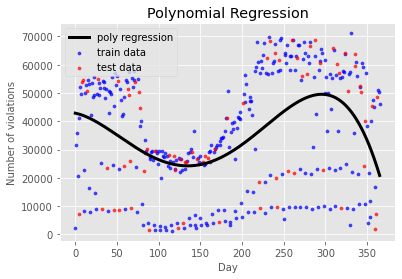

In [154]:
x = np.arange(len(data_num_day))
y = data_num_day.iloc[:,1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(x_train.reshape(-1,1)) 

poly.fit(X_poly, y_train) 
reg2 = linear_model.LinearRegression() 
reg2.fit(X_poly, y_train) 

plt.scatter(x_train,y_train,color='b',s=10,alpha=0.7,label='train data')
plt.scatter(x_test,y_test,color='r',s=10,alpha=0.7,label='test data') 
plt.plot(x, reg2.predict(poly.fit_transform(x.reshape(-1,1))), color = 'black',linewidth=3,label='poly regression') 
plt.title('Polynomial Regression') 
plt.xlabel('Day',fontsize=10)
plt.ylabel('Number of violations',fontsize=10)
plt.legend()
print('The slope is {} and the intercept is {}.'.format(reg2.coef_,reg2.intercept_))

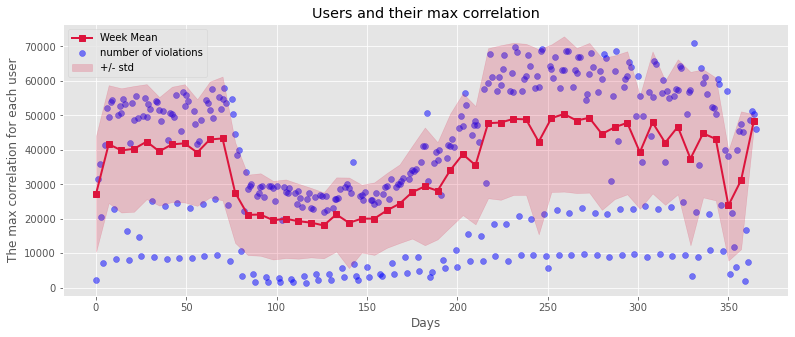

In [155]:
width = 7
grid = list(np.arange(0,len(data_num_day),width))
cond_mean = np.zeros(len(grid))
cond_std = np.zeros(len(grid))
count = 0
lst = []

for i,ii in enumerate(grid):
    for j in range(len(data_num_day)):
        if j >= ii and j < ii + width:
            count += 1
            cond_mean[i] += data_num_day['Number of violations'][j]
    cond_mean[i] = cond_mean[i]*(1/count)
    count = 0

for i,ii in enumerate(grid):
    for j in range(len(data_num_day)):
        if j >= ii and j < ii + width:
            lst.append(data_num_day['Number of violations'][j])
    cond_std[i] = np.std(lst)
    lst = []


plt.figure(figsize=(13,5))
plt.scatter(np.arange(len(data_num_day)),data_num_day['Number of violations'], alpha = 0.5,color='blue',label='number of violations')
plt.plot(grid[:],cond_mean[:],'-s',lw=2,color='crimson', label="Week Mean ")
plt.fill_between(grid[:], cond_mean[:]-cond_std[:], 
                cond_mean[:]+cond_std[:], color='crimson', alpha=0.2, label="+/- std")
plt.xlabel('Days')
plt.ylabel('The max correlation for each user')
plt.title('Users and their max correlation')
plt.legend()

# Total number of violations? Number of violations of each violation code? 

In [ ]:
#file name: data_2018 / data_2019/ data_2020

In [139]:
df_vd_2018 = data_2018['Violation Description'].value_counts().head(3)
df_vd_2018

PHTO SCHOOL ZN SPEED VIOLATION    1013212
FAILURE TO STOP AT RED LIGHT       486518
BUS LANE VIOLATION                 212465
Name: Violation Description, dtype: int64

In [138]:
data_2018['Violation Description'].count()

2586391

In [127]:
df_vd_2019 = data_2019['Violation Description'].value_counts()
df_vd_2019

PHTO SCHOOL ZN SPEED VIOLATION    2350126
FAILURE TO STOP AT RED LIGHT       429868
BUS LANE VIOLATION                 248367
MOBILE BUS LANE VIOLATION            2219
Field Release Agreement               612
Name: Violation Description, dtype: int64

In [132]:
data_2019['Violation Description'].isna().count()

12773449

In [134]:
data_2019['Violation Description'].

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
12773444    NaN
12773445    NaN
12773446    NaN
12773447    NaN
12773448    NaN
Name: Violation Description, Length: 12773449, dtype: object

In [126]:
df_vd_2020 = data_2020['Violation Description'].value_counts().head(5)
df_vd_2020

PHTO SCHOOL ZN SPEED VIOLATION    4397347
FAILURE TO STOP AT RED LIGHT       389420
BUS LANE VIOLATION                 338606
21-No Parking (street clean)       214599
38-Failure to Dsplay Meter Rec     180539
Name: Violation Description, dtype: int64

In [88]:
new_table_2018 = pd.DataFrame(data_2018.groupby('Violation Description')['Plate ID'].count().dropna()) 
#the number of violation in 2018
new_table_2018['Plate ID'].sum()

2586364

In [87]:
new_table_2019 = pd.DataFrame(data_2019.groupby('Violation Description')['Plate ID'].count().dropna()) 
#the number of violation in 2018
new_table_2019['Plate ID'].sum()

3031192

In [89]:
new_table_2020 = pd.DataFrame(data_2020.groupby('Violation Description')['Plate ID'].count().dropna()) 
#the number of violation in 2018
new_table_2020['Plate ID'].sum()

6686511

In [84]:
data_2018['Violation Description'].dropna().value_counts().sum()

2586391

In [86]:
data_2019['Violation Description'].dropna().value_counts().sum()

3031192

In [90]:
data_2020['Violation Description'].dropna().value_counts().sum()

6686521

In [91]:
value_2020 = data_2020['Violation Description'].dropna().value_counts().sum()
value_2019 = data_2019['Violation Description'].dropna().value_counts().sum()
value_2018 = data_2018['Violation Description'].dropna().value_counts().sum()

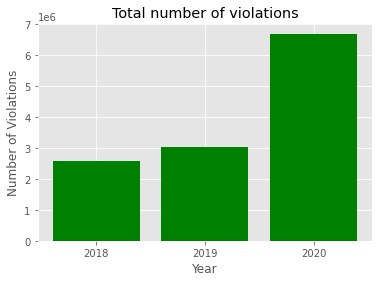

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['2018', '2019', 
          '2020'] # 柱状图横坐标的名字
energy = [2586391,  3031192, 6686521]

plt.bar(x, energy, color='green')
plt.xlabel("Year")
plt.ylabel("Number of Violations")
plt.title("Total number of violations")

plt.show()